# Búsqueda de estructuras en “datos puntuales”

## Ejercicio

- Generar una distribución de puntos aleatoria en una caja de lado L.
- Calcular la funciónd de correlación y verificar que en el cubo generado, ésta es cero.
- Que el programe funcione en 2 y 3 dimensiones.
- Usar el código para calcular 2PCF en el conjunto de datos que nos proporcionará
- ¿Cómo haría más eficiente el cálculo?

### Inicialización

In [2]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import math
from IPython.display import clear_output

### Códigos de cálculos

#### Generar una distribución de puntos aleatorios en un cubo de lado L

In [3]:
def generateCubeRandom(L=1, seed= False, numeroPuntos=5, dimensiones=3):
    '''
    Descripción: Función que genera puntos aleatorios dentro de un cubo.
    IN = {
        L: El tamaño de los lados del cubo
        seed: Una seed para tener datos consistentes, si es False entonces es 100% random
        numeroPuntos: El número de puntos que queremos generar
    }
    OUT: Una lista de puntos aleatorios dentro del cubo de lado L
    '''
    if seed:
        np.random.seed(seed)
    if dimensiones==3:
        puntos=[[np.random.uniform(0, L),np.random.uniform(0, L),np.random.uniform(0, L)] for punto in range(numeroPuntos)]
    else:
        puntos=[[np.random.uniform(0, L),np.random.uniform(0, L),0] for punto in range(numeroPuntos)]
 
    return puntos

#### Función de correlación

In [104]:
def correlacionFuncion(puntos, r, d, L=1):
    '''
    Descripción: Calcula la función de correlación de unos puntos dados
    IN = {
        puntos: Lista de puntos en 2 o 3 dimensiones.
        r: Parámetro de distancia entre puntos.
        L: El tamaño de nuestra distribución aleatoria (Lado del cubo que queramos).
        d: El rango de aceptación de nuestras comparaciones
    }
    OUT: El valor de la función de correlación en ese punto
    '''
    # Primero calculamos el número de puntos.
    numeroPuntos = len(puntos)
    # Calculamos también el número de pares que hay en la distribución original
    # Este número de pares es el mismo para la distribución aleatorio que se mencionará luego
    f = math.factorial
    numeroPares = f(numeroPuntos) / (2 * f(numeroPuntos - 2))
    # Y calculamos el número de pares de puntos en la distribución combinada (ver más adelante)
    numeroParesCombinados = f(2*numeroPuntos) / (2*f(2*numeroPuntos-2))
    
    #  Creamos una matriz de distancias que significa, la distancia para cada par de números.
    matrizDistancias = crearMatrizDistancias(puntos, numeroPuntos)
    
    # Creamos una distribución aleatoria, en este caso es un cubo y de nuevo y su matriz de distancias.
    newPuntos = generateCubeRandom(L=L, numeroPuntos=numeroPuntos)
    newMatrizDistancias = crearMatrizDistancias(newPuntos, numeroPuntos)
    
    # Ahora, creamos una nueva serie de puntos concatenando 'puntos' y newPuntos y creamos su matriz de distancias.
    puntosCombinados = puntos + newPuntos
    matrizCombinada = crearMatrizDistancias(puntosCombinados, 2*numeroPuntos)
    
    ###################################### DEBBUGEANDO ##############################################
    #print(matrizDistancias)
    #print("----------------------------------------------------")
    #print(newMatrizDistancias)
    #print("----------------------------------------------------")
    #print(matrizCombinada)
    ###################################### DEBBUGEANDO ##############################################


    # Creamos el rango en el que queremos que compare las distancias
    dr = [r-d,r+d]
    
    # Calculamos DD(r) que es:
    # El número de pares de puntos separados por una distancia r en la distribución original.
    # También RR(r) que es:
    # Número de pares de puntos separados a una distancia  en una distribución aleatoria (cubo aleatorio)
    # Al igual que DR(r) que es:
    # Número de pares de puntos separados a una distancia  en la combinación de las distribuciones anteriores
    # ¡ Tenemos que NORMALIZAR estos valores por la cantidad de pares en total que hay !
    listaDD=[] # Empezamos una lista vacía
    listaDR=[] # Empezamos una lista vacía
    listaRR=[] # empezamos una lista vacía
    
    # Recorremos la matriz de distancias y la que se encuentre dentro del rango dr la registramos.
    for index in range(2*numeroPuntos):
            for jndex in range(index, 2*numeroPuntos):
                if(index < numeroPuntos and jndex < numeroPuntos):
                    #print(f"[{index},{jndex}]-------->{matrizDistancias[index][jndex]}") ¡DEBUG! nada importante
                    # Para DD(r)
                    if dr[0] <= matrizDistancias[index][jndex] <= dr[1] and index != jndex:
                        listaDD.append([index,jndex])
                    # Para RR(r)
                    if dr[0] <= newMatrizDistancias[index][jndex] <= dr[1] and index != jndex:
                        listaRR.append([index,jndex])
                # Para DR(r) note que de DR(r) son más elementos, por eso están separados por un if
                if dr[0] <= matrizCombinada[index][jndex] <= dr[1] and index != jndex:
                    listaDR.append([index, jndex])
                    
    ###################################### DEBBUGEANDO ##############################################
    #print(listaDD)
    #print("----------------------------------------------------")
    #print(listaRR)
    #print("----------------------------------------------------")
    #print(listaDR)
    ###################################### DEBBUGEANDO ##############################################
 
                    
    DD = len(listaDD)/numeroPares # Evidentemente DD(r) es el tamaño de la lista (Están normalizados)
    RR = len(listaRR)/numeroPares # Evidentemente RR(r) es el tamaño de la lista (Están normalizados)
    DR = len(listaDR)/numeroParesCombinados # Evidentemente DR(r) es el tamaño de la lista (Están normalizados)
    
    ###################################### DEBBUGEANDO ##############################################
    #print(DD)
    #print(RR)
    #print(DR)
    ###################################### DEBBUGEANDO ##############################################
    
    # Regresamos el valor de nuestra funcnión de correlación, si RR==0 entonces sólo regresamos false
    if RR==0:
        return 0
    else:
        #print((DD - 2*DR + RR)/RR)
        return (DD - 2*DR + RR)/RR

In [119]:
def funcionCorrelacionAmpliada(data, L, bins=10, a=1, b=2):
    '''
    Descripción: Esto calcula la función de correlación para una serie de puntos dados unos datos.
    IN = {
        data: Los datos de los cuales queremos saber su función de correlación.
        L: El tamaño de nuestro cubo para la distrubución aleatoria.
        bins: El rango en el que se aceptarán los datos como "cercanos" en la función de correlación.
        a: Punto inicial de nuestra r.
        b: Punto final.
    }
    OUT: Una lista con el rango de r y la función de correlación para un intervalo de r=a hasta r=b.
    '''
    r = list(range(a,b+1))
    xi = []
    # Hacemos un for para abarcar todo eso
    print(f'0/{b}')
    for distancia in r:
        xi.append(correlacionFuncion(puntos=data, r=distancia, d=bins, L=L))
        clear_output(wait=True)
        print(f'{distancia}/{b}')
    return [r,xi]

#### Funciones auxiliares para correlación

In [5]:
def distancia2Puntos(punto1, punto2):
    '''
    Descripción: Calcula la distancia entre 2 puntos dados en 3 dimensiones
    IN = {
        punto1 y punto2: Los dos puntos a tratar.
    }
    OUT: El valor de la distancia entre estos dos puntos
    '''
    dx=(punto1[0]-punto2[0])
    dy=(punto1[1]-punto2[1])
    dz=(punto1[2]-punto2[2])
    
    return (dx**2+dy**2+dz**2)**(1/2)

In [6]:
def crearMatrizDistancias(puntos, numeroPuntos):
    '''
    Descripción: Calcula la distancia entre pares de puntos de una lista
    IN = {
        puntos: Lista de puntos a tratar.
        numeroPuntos: Número de puntos a tratar.
    }
    OUT: Una matriz con la distancia de puntos dada de la siguiente manera:
    "La distancia entre el punto n y el punto m es la componente matriz[n][m] de la matriz"
    '''
    # Aquí, se crea una matriz que guardará la distancia entre pares de números, note que la matriz es
    # simétrica entonces no es necesario hacer las n^2 operaciones
    distanciaPares = np.zeros(shape=(numeroPuntos,numeroPuntos))
    for index, punto in enumerate(puntos):
        for jndex in range(index,numeroPuntos):
            distanciaPares[index][jndex] = distancia2Puntos(punto,puntos[jndex])
            distanciaPares[jndex][index] = distanciaPares[index][jndex]
    
    return distanciaPares

### Códgios de visualización

#### Graficar el cubo

In [7]:
def graphCube(puntos, color="purple"):
    '''
    Descripción: Función que grafica puntos en 3D.
    IN = {
        coord: Una lista con coordenas [x,y,z], que a su vez, cada variable son una lista
        color: Inidica el color de nuestra gráfica
    }
    OUT: Gráfica 3d de los puntos
    '''
    # Transformaremos los puntos de manera más amigable para la función de abajo:
    x=[punto[0] for punto in puntos]
    y=[punto[1] for punto in puntos]
    z=[punto[2] for punto in puntos]

    # Ahora sí, esta parte grafica pero no sé exactamente qué hace xddd
    fig = plt.figure(figsize = (7,7)) # Define el tamaño de nuestra gráfica
    ax1 = fig.add_subplot(projection='3d') # Aparentemente le decimos que es el 3D
    ax1.scatter(x, y, z, "r", marker='.', color=color) # Pintamos cada punto en su respectiva posición

#### Graficar x,y normal

In [142]:
def graphFunction(x,y, color=["purple","blue"], labels=["x","y"], titulo="", scatter=False, corte=[0,-1]):
    '''
    Descripción: Función que grafica y con respecto a x
    IN = {
        x: Variable independiente.
        y: Variable dependiente.
        color: El color de la gráfica.
        labels: El nombre de las variables.
        titulo: El título
        scatter: Si es que se quieren resaltar los puntos
    }
    Out: Una bonita gráfica x-y
    '''
    # Creamos el objeto figura y nuestro ax.
    fig, ax = plt.subplots(figsize = (10, 7))
    # ponemos título
    ax.set_title(titulo)
    # Graficamos
    if scatter:
        ax.scatter(x[corte[0]:corte[1]],y[corte[0]:corte[1]], marker='.', c=color[0])
    ax.plot(x[corte[0]:corte[1]], y[corte[0]:corte[1]], color=color[1]) # Graficamos
    ax.set_xlabel(labels[0]) # Asignamos nombres a los labels
    ax.set_ylabel(labels[1]) # Asignamos nombres a los labels
    ax.grid() # Con cuadrícula

### Ejecutando el código

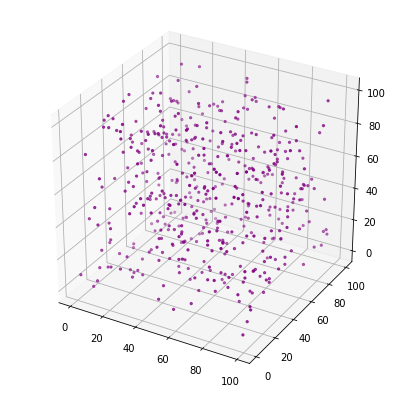

In [123]:
cube1 = generateCubeRandom(L=100, numeroPuntos=500)
graphCube(cube1)

### Grafiquemos esto a la función de correlación respecto a r

In [124]:
aux = funcionCorrelacionAmpliada(data=cube1,L=100,bins=30,a=1,b=400)
r = aux[0]
xi = aux[1]

400/400


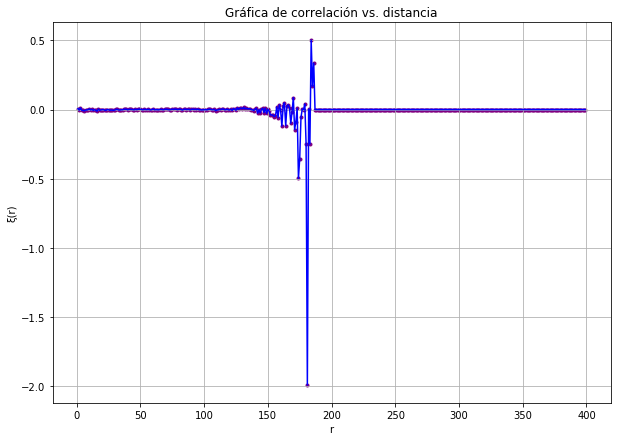

In [153]:
graphFunction(x=r,y=xi,titulo="Gráfica de correlación vs. distancia", labels=["r","ξ(r)"], scatter=True)

### Graficamos r^2*ξ(r)

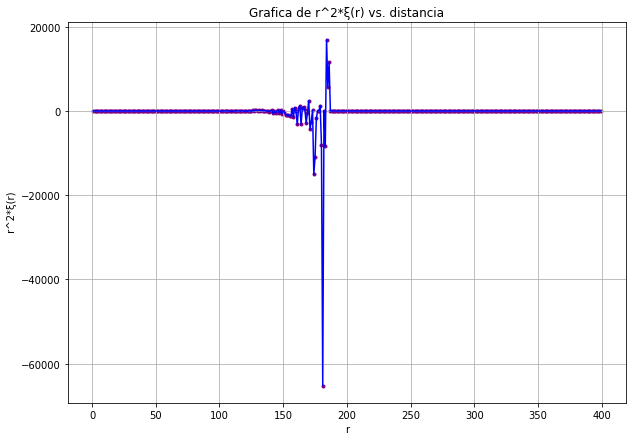

In [143]:
r2xi=np.array(r)**2 * np.array(xi)
graphFunction(x=r,y=r2xi,titulo="Grafica de r^2*ξ(r) vs. distancia", labels=["r"," r^2*ξ(r)"], scatter=True)

### Podemos hacer un burning para ver mejor 

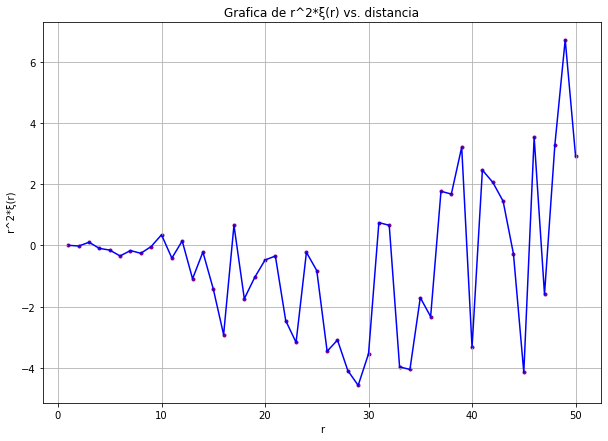

In [149]:
graphFunction(x=r,y=r2xi,titulo="Grafica de r^2*ξ(r) vs. distancia", labels=["r"," r^2*ξ(r)"], scatter=True, corte=[0,50])

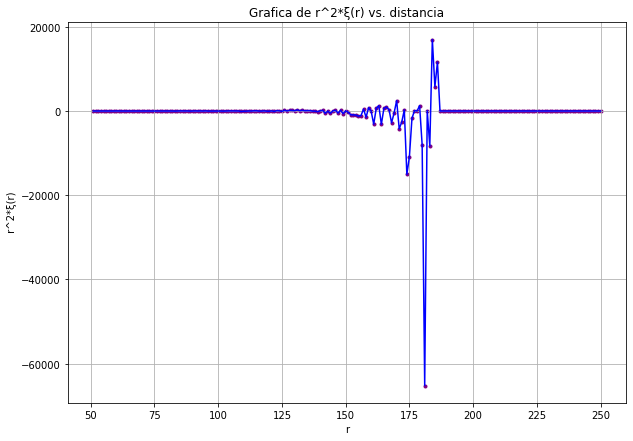

In [151]:
graphFunction(x=r,y=r2xi,titulo="Grafica de r^2*ξ(r) vs. distancia", labels=["r"," r^2*ξ(r)"], scatter=True, corte=[50,250])